In [2]:
#multiple lin regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index = pd.read_csv("/content/economic_index.csv")

In [4]:
print(df_index.head())

   Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
0           0  2017     12           2.75                5.3         1464
1           1  2017     11           2.50                5.3         1394
2           2  2017     10           2.50                5.3         1357
3           3  2017      9           2.50                5.3         1293
4           4  2017      8           2.50                5.4         1256


In [5]:
#deleting unnecessary columns
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis = 1, inplace = True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
#check for null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

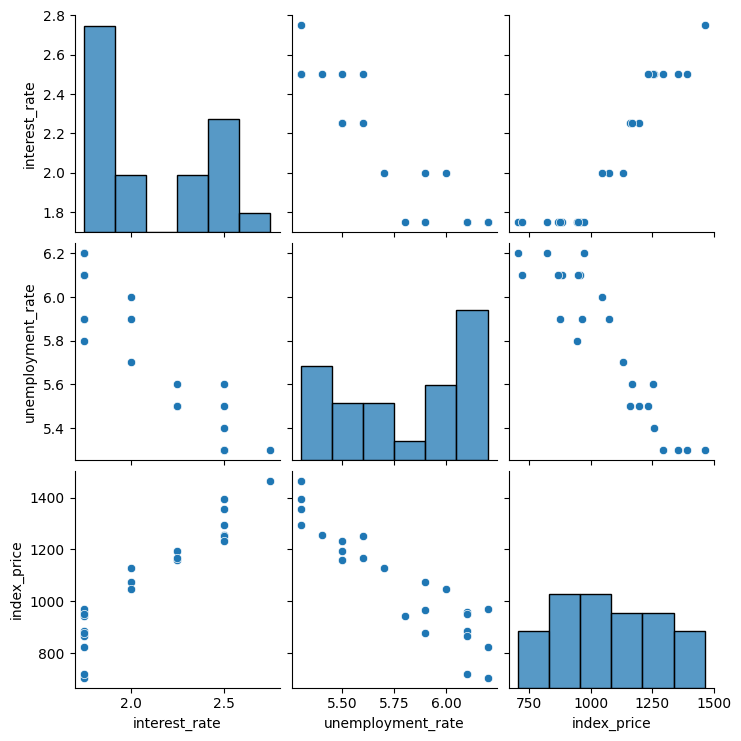

In [9]:
#some visualization
import seaborn as sns
sns.pairplot(df_index)

In [10]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0.5, 1.0, 'Interest Rate vs Unemployment Rate')

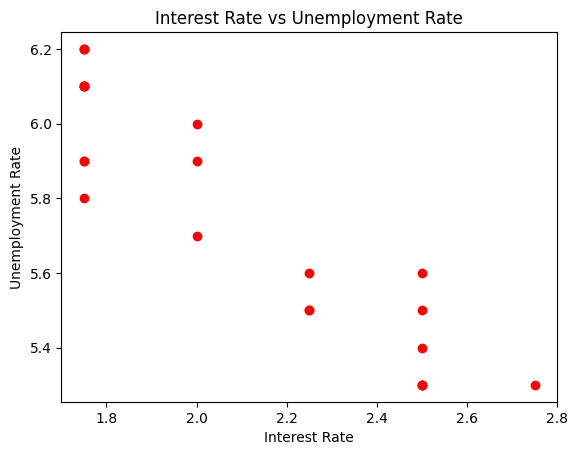

In [12]:
#visualize datappoint more closely
plt.scatter(df_index["interest_rate"], df_index["unemployment_rate"], color = "red")
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")
plt.title("Interest Rate vs Unemployment Rate")

In [24]:
#get indep and dep features
# X = df_index[["interest_rate", 'unemployment_rate']]
X = df_index.iloc[:,:-1]
# y = df_index["unemployment_rate"]
y = df_index.iloc[:,-1]

In [25]:
# print(X, X.head())
# print(y, y.head())

In [26]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

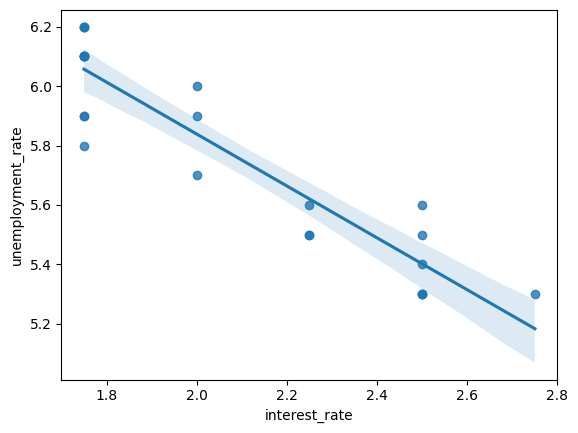

In [27]:
import seaborn as sns
sns.regplot(x = df_index["interest_rate"], y = df_index["unemployment_rate"]) #regression plot
#use x and y for the plot to happen in this version

In [28]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regressor, X_train, y_train, cv = 3, scoring = 'neg_mean_squared_error')
#cv = 5 means, training data records will be divided by cv value, i.e. 5
#so the resulting number would be the amount of data points that we consider for testing data, this is explained in the onenote better
print(validation_score)

[-4921.61331265 -7686.87497294 -5135.9962549 ]


In [34]:
print(np.mean(validation_score))

-5914.828180162386


In [35]:
##prediction
y_pred = regressor.predict(X_test)

In [36]:
print(y_pred)

[1204.22770398  821.65051903 1406.51300368  857.70889608  994.90992298
 1168.16932693]


In [37]:
#performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [38]:
# R^2 = 1-SSR/SST
# R2 = coeff of determination
# SST = sum of sq o residuals
# SST = sum of sq of squared error

score = r2_score(y_test,y_pred)
print(score)

0.8278978091457145


In [39]:
# #adj R score
# R2 = 1-[(1-R2)(n-1)/(n-k-1)]
# R2 = R2 score of the model
# n = number of observations
# k = number of predictor variables
print(1 - (1-score) * (len(y_test)-1) / (len(y_test)- X_test.shape[1] - 1 ))

0.7131630152428576


Text(0.5, 1.0, 'Actual vs Predicted')

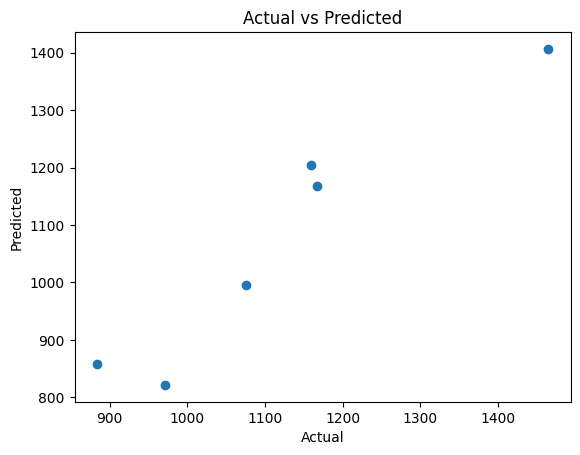

In [40]:
## Assumptions
# 1. plot between y_test and y_pred
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

In [42]:
#residuals
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


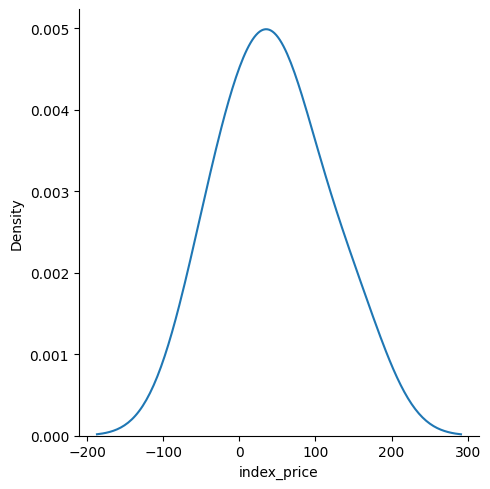

In [43]:
#plot the residuals
sns.displot(residuals, kind = "kde")

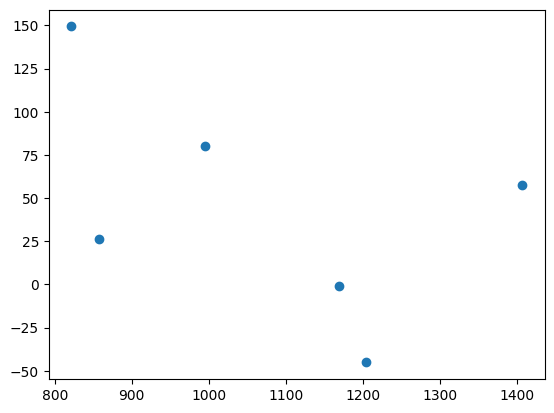

In [44]:
#create a scatter plot wrt residuals and predictions
plt.scatter(y_pred, residuals)

In [45]:
#OLS lin regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [46]:
print(model.predict(X_test))

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [47]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 18 Jul 2024   Prob (F-statistic):                       0.754
Time:                        11:30:51   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [49]:
print(regressor.coef_)

[  88.27275507 -116.25716066]


In [50]:
#matches!